# EJERCICIO PRÁCTICO

## Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Importar datos

In [6]:
departamentos = pd.read_csv('colombia_departamentos.csv')
casos = pd.read_csv('dataIns.csv', delimiter=';')

In [56]:
casos.head()

,Fecdiagnostico,CiudadUbicacion,DepartDistr,Status,Edad,Sexo,Tipo,Paissprocedencia
IDcaso,,,,,,,,
1,2020-03-06,Bogotá,Bogota,Recuperado,19,F,Importado,Italia
2,2020-03-09,Buga,Valle del Cauca,Recuperado,34,M,Importado,España
3,2020-03-09,Medellín,Antioquia,Recuperado,50,F,Importado,España
4,2020-03-11,Medellín,Antioquia,Recuperado,55,M,Relacionado,Colombia
5,2020-03-11,Medellín,Antioquia,Recuperado,25,M,Relacionado,Colombia


In [9]:
departamentos.head()

,state,Latitude,Longitude
0,Bogota,4.60971,-74.08175
1,Amazonas,-4.21528,-69.94056
2,Antioquia,6.25184,-75.56359
3,Arauca,7.08471,-70.75908
4,Atlantico,10.96854,-74.78132


## Tratamiento de datos

### Homologación de datos

Los departamentos son el dato en común de las dos tablas. Sin embargo, la información difiere en las tablas por lo que se debe homologar para que queden aptas para trabajar en conjunto.

En este caso, "casos" es nuestra tabla principal, por lo que es la única que nos importa arreglar.

In [14]:
casos['DepartDistr'].sort_values().unique()

array(['Antioquia', 'Atlántico', 'Barranquilla D.E.', 'Bogotá D.C.',
       'Bolívar', 'Boyacá', 'Caldas', 'Cartagena D.T. y C', 'Casanare',
       'Cauca', 'Cesar', 'Cundinamarca', 'Córdoba', 'Huila', 'La Guajira',
       'Meta', 'Nariño', 'Norte de Santander', 'Quindío', 'Risaralda',
       'San Andrés', 'Santa Marta D.T. y C.', 'Santander', 'Sucre',
       'Tolima', 'Valle del Cauca'], dtype=object)

In [15]:
departamentos['state'].sort_values().unique()

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlantico', 'Bogota',
       'Bolivar', 'Boyaca', 'Caldas', 'Caqueta', 'Casanare', 'Cauca',
       'Cesar', 'Choco', 'Cordoba', 'Cundinamarca', 'Guainia', 'Guaviare',
       'Huila', 'La Guajira', 'Magdalena', 'Meta', 'Narino',
       'Norte de Santander', 'Putumayo', 'Quindio', 'Risaralda',
       'San Andres y Providencia', 'Santander', 'Sucre', 'Tolima',
       'Valle del Cauca', 'Vaupes', 'Vichada'], dtype=object)

In [18]:
casos['DepartDistr'].replace({
    'Atlántico': 'Atlantico',
    'Barranquilla D.E.': 'Atlantico',
    'Bogotá D.C.': 'Bogota',
    'Bolívar': 'Bolivar',
    'Boyacá': 'Boyaca',
    'Cartagena D.T. y C': 'Bolivar',
    'Córdoba': 'Cordoba',
    'Quindío': 'Quindio',
    'San Andrés': 'San Andres y Providencia',
    'Santa Marta D.T. y C.': 'Magdalena'
} , inplace = True)
casos['DepartDistr'].sort_values().unique()

array(['Antioquia', 'Atlantico', 'Bogota', 'Bolivar', 'Boyaca', 'Caldas',
       'Casanare', 'Cauca', 'Cesar', 'Cordoba', 'Cundinamarca', 'Huila',
       'La Guajira', 'Magdalena', 'Meta', 'Nariño', 'Norte de Santander',
       'Quindio', 'Risaralda', 'San Andres y Providencia', 'Santander',
       'Sucre', 'Tolima', 'Valle del Cauca'], dtype=object)

### Establecer índice

In [23]:
casos.set_index('IDcaso', inplace = True)

KeyError: "None of ['IDcaso'] are in the columns"

### Revisar y cambiar tipos de datos

In [41]:
casos.dtypes

Fecdiagnostico      datetime64[ns]
CiudadUbicacion             object
DepartDistr                 object
Status                      object
Edad                         int64
Sexo                        object
Tipo                        object
Paissprocedencia            object
dtype: object

In [42]:
casos['Fecdiagnostico'] = pd.to_datetime(casos['Fecdiagnostico'], format = '%d/%m/%Y')

### Revisar datos nulos

In [43]:
casos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1267 entries, 1 to 1267
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecdiagnostico    1267 non-null   datetime64[ns]
 1   CiudadUbicacion   1267 non-null   object        
 2   DepartDistr       1267 non-null   object        
 3   Status            1267 non-null   object        
 4   Edad              1267 non-null   int64         
 5   Sexo              1267 non-null   object        
 6   Tipo              1267 non-null   object        
 7   Paissprocedencia  1267 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 121.4+ KB


In [44]:
casos.isna().sum()

Fecdiagnostico      0
CiudadUbicacion     0
DepartDistr         0
Status              0
Edad                0
Sexo                0
Tipo                0
Paissprocedencia    0
dtype: int64

## Análisis de datos

### Análisis por sexo

In [45]:
# Número de casos por sexo
casos['Sexo'].value_counts()

Sexo
M    642
F    625
Name: count, dtype: int64

<BarContainer object of 2 artists>

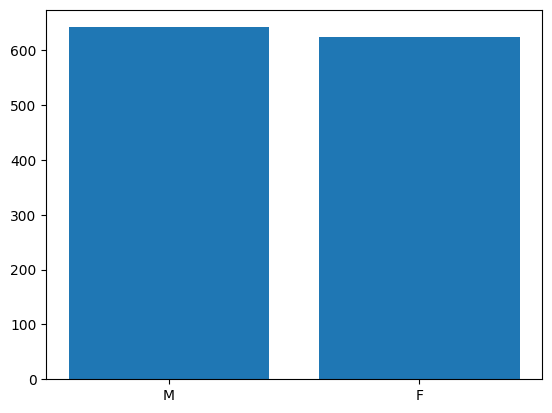

In [47]:
# Gráfico de barras sobre el número de casos por sexo
plt.bar(casos['Sexo'].value_counts().index, casos['Sexo'].value_counts())

In [63]:
# Número de personas recuperadas por sexo
casos.loc[casos['Status'] == 'Recuperado', 'Sexo'].value_counts()

Sexo
F    31
M    24
Name: count, dtype: int64

<BarContainer object of 2 artists>

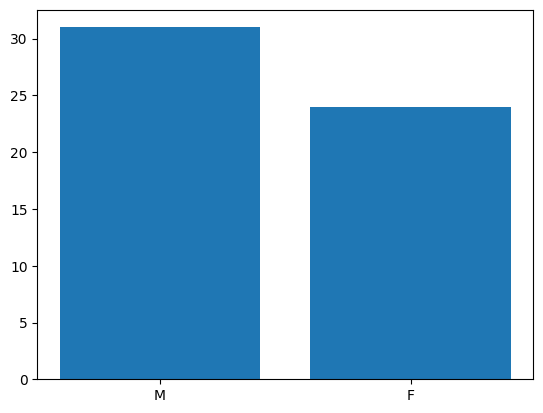

In [64]:
# Gráfico de barras sobre el número de personas recuperadas por sexo
plt.bar(casos['Sexo'].value_counts().index,
        casos.loc[casos['Status'] == 'Recuperado', 'Sexo'].value_counts()
       )

In [67]:
# Porcentaje de personas recuperadas por sexo
recuperados = casos.loc[casos['Status'] == 'Recuperado', 'Sexo'].value_counts()
total = casos['Sexo'].value_counts()

round(recuperados/total * 100, 2)


Sexo
F    4.96
M    3.74
Name: count, dtype: float64

### Análisis por país de procedencia

In [68]:
# Número de casos por país de procedencia
casos['Paissprocedencia'].value_counts()

Paissprocedencia
Colombia                                           725
España                                             194
Estados Unidos                                     131
Ecuador                                             31
México                                              27
Panamá                                              16
Turquía                                             14
Francia                                             13
Brasil                                              11
Puerto Rico                                          9
Londres                                              8
Italia                                               6
Islas San Martin                                     6
Jamaica                                              5
Alemania                                             5
Turquia                                              5
República Dominicana                                 3
Canadá                                          

<BarContainer object of 57 artists>

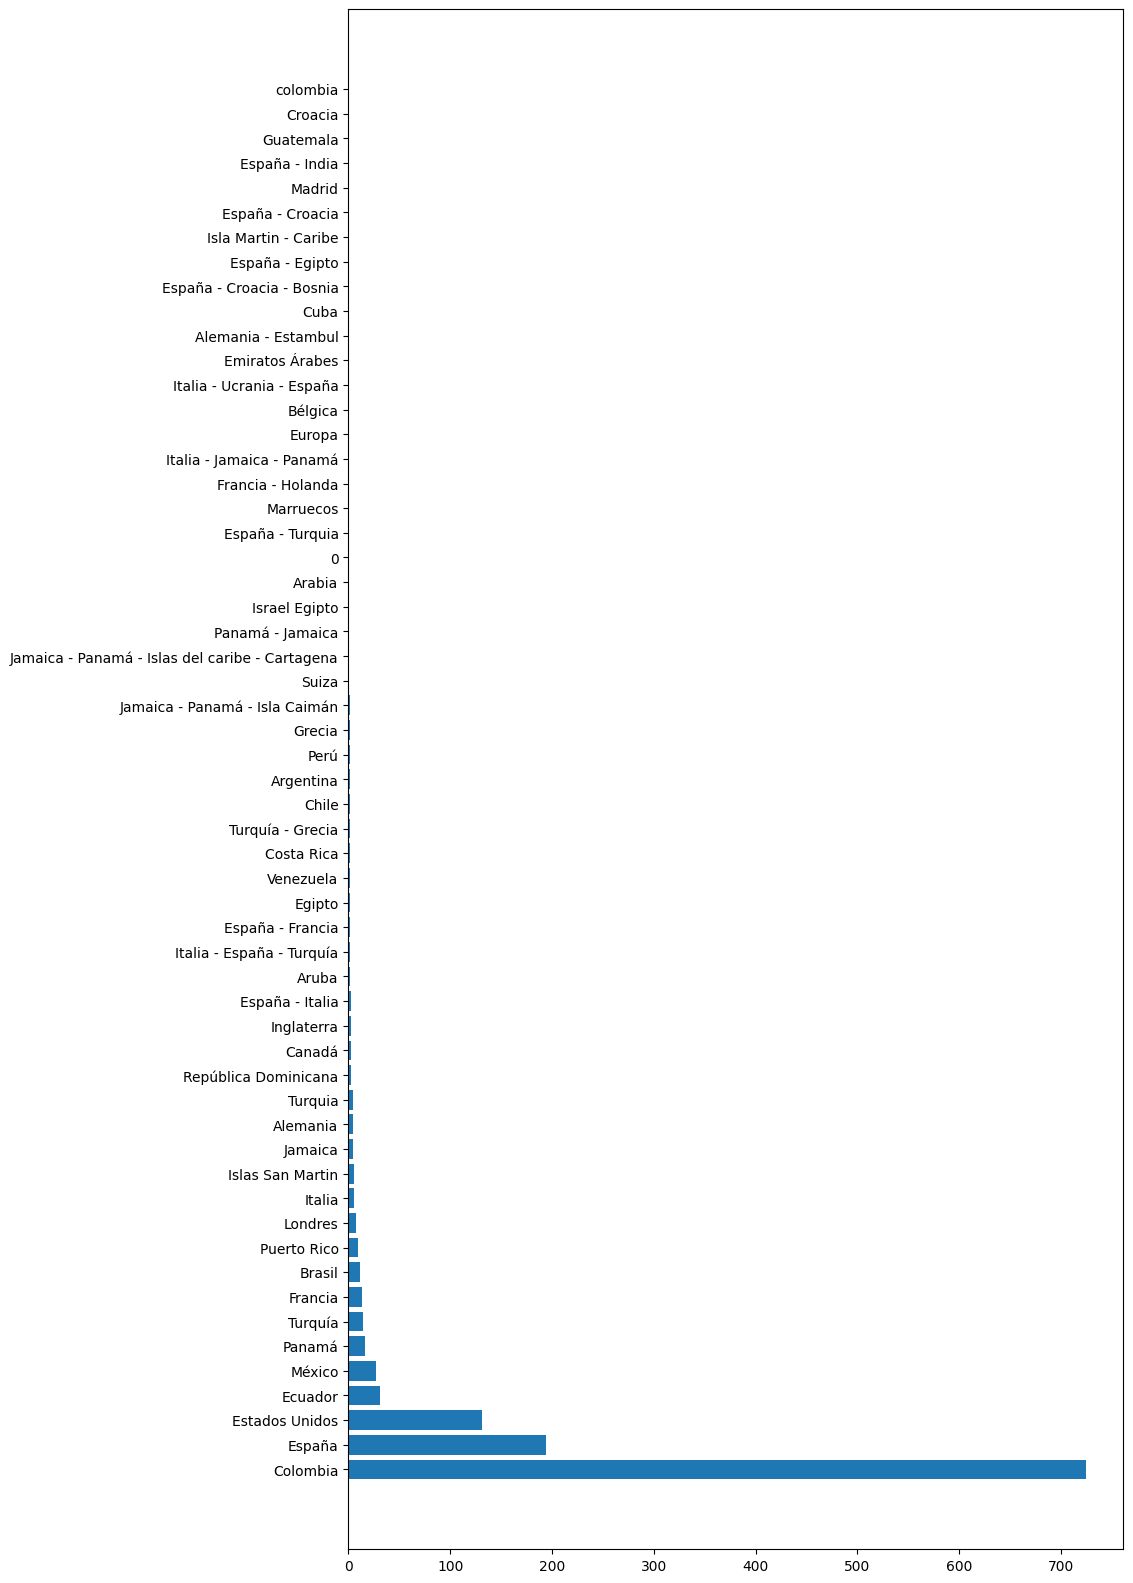

In [85]:
# Gráfico de barras sobre el número de casos por país de procedencia
plt.figure(figsize = (10, 20))
plt.barh(casos['Paissprocedencia'].value_counts().index, casos['Paissprocedencia'].value_counts())

In [86]:
# Número de personas fallecidas por país de origen
casos.loc[casos['Status'] == 'Fallecido', 'Paissprocedencia'].value_counts()

Paissprocedencia
Colombia    24
España       1
Name: count, dtype: int64

<BarContainer object of 2 artists>

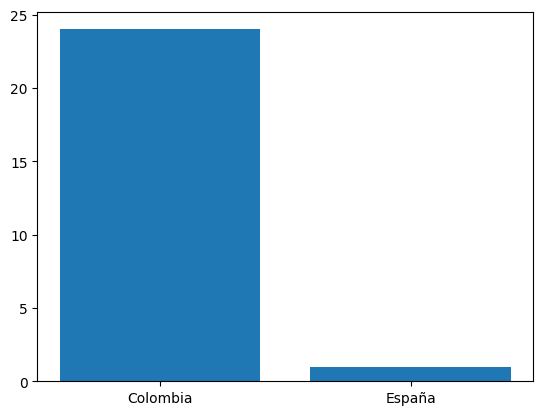

In [94]:
# Gráfico de barras sobre el número de personas fallecidas por pais de origen
plt.bar(casos.loc[casos['Status'] == 'Fallecido', 'Paissprocedencia'].value_counts().index,
        casos.loc[casos['Status'] == 'Fallecido', 'Paissprocedencia'].value_counts()
       )

In [90]:
# Porcentaje de personas recuperadas por sexo
fallecidos = casos.loc[casos['Status'] == 'Fallecido', 'Paissprocedencia'].value_counts()
total = casos['Paissprocedencia'].value_counts()

round(fallecidos/total * 100, 2)

Paissprocedencia
0                                                   NaN
Alemania                                            NaN
Alemania - Estambul                                 NaN
Arabia                                              NaN
Argentina                                           NaN
Aruba                                               NaN
Brasil                                              NaN
Bélgica                                             NaN
Canadá                                              NaN
Chile                                               NaN
Colombia                                           3.31
Costa Rica                                          NaN
Croacia                                             NaN
Cuba                                                NaN
Ecuador                                             NaN
Egipto                                              NaN
Emiratos Árabes                                     NaN
España                         

## Mapa

In [113]:
import geopandas as gpd
import seaborn as sns

In [99]:
colombia_dgf = gpd.read_file('MGN_ANM_DPTOS.shp')

In [100]:
colombia_dgf

,DPTO_CCDGO,DPTO_CNMBR,VERSION,AREA,LATITUD,LONGITUD,STCTNENCUE,STP3_1_SI,STP3_2_NO,STP3A_RI,...,STP34_9_ED,STP51_PRIM,STP51_SECU,STP51_SUPE,STP51_POST,STP51_13_E,STP51_99_E,Shape_Leng,Shape_Area,geometry
0,18,CAQUETÃ,2018,9.010301e+10,0.798556,-73.959468,163381.0,1117.0,162264.0,1117.0,...,4885.0,139145.0,126283.0,30474.0,6130.0,17844.0,10238.0,21.384287,7.318485,"POLYGON ((-74.89423 2.95852, -74.89410 2.95852..."
1,19,CAUCA,2018,3.124291e+10,2.396834,-76.824233,622959.0,83033.0,539926.0,70827.0,...,25952.0,479582.0,449016.0,126327.0,18944.0,56673.0,17057.0,13.950263,2.534419,"POLYGON ((-76.45922 3.32872, -76.45878 3.32870..."
2,86,PUTUMAYO,2018,2.597628e+10,0.452260,-75.855912,147797.0,4704.0,143093.0,4659.0,...,3756.0,104699.0,107564.0,27821.0,4283.0,11058.0,5630.0,12.707922,2.107965,"POLYGON ((-76.67050 1.46732, -76.67000 1.46730..."
3,76,VALLE DEL CAUCA,2018,2.066554e+10,3.858858,-76.518694,1674673.0,18250.0,1656423.0,3618.0,...,101105.0,1012179.0,1616067.0,699312.0,83581.0,111703.0,49860.0,12.650870,1.679487,"MULTIPOLYGON (((-77.23810 4.04049, -77.23774 4..."
4,94,GUAINÃA,2018,7.128935e+10,2.727843,-68.816613,13059.0,3675.0,9384.0,3675.0,...,241.0,20076.0,12369.0,2819.0,461.0,2545.0,1886.0,21.179051,5.747937,"POLYGON ((-67.67638 3.91228, -67.67305 3.90931..."
5,99,VICHADA,2018,1.000634e+11,4.713557,-69.414000,24915.0,6870.0,18045.0,6870.0,...,483.0,31488.0,20437.0,4055.0,573.0,6874.0,3657.0,17.292613,8.100680,"POLYGON ((-67.80972 6.32432, -67.80946 6.32432..."
6,85,CASANARE,2018,4.439424e+10,5.404064,-71.601881,200495.0,1324.0,199171.0,1324.0,...,4138.0,129130.0,146374.0,46073.0,6900.0,14502.0,5762.0,12.132754,3.615063,"POLYGON ((-72.33885 6.34471, -72.33920 6.34454..."
7,91,AMAZONAS,2018,1.094971e+11,-1.546228,-71.502129,21728.0,5008.0,16720.0,5008.0,...,466.0,20903.0,27075.0,5118.0,723.0,2037.0,3127.0,25.355977,8.877480,"POLYGON ((-71.14469 0.05572, -71.14508 0.05349..."
8,97,VAUPÃS,2018,5.329928e+10,0.646246,-70.561406,8008.0,4332.0,3676.0,4332.0,...,244.0,16705.0,12162.0,1791.0,336.0,1848.0,1668.0,20.129834,4.313810,"POLYGON ((-70.11033 2.08010, -70.10981 2.08002..."
9,95,GUAVIARE,2018,5.557523e+10,1.924532,-72.128596,34687.0,1429.0,33258.0,1429.0,...,642.0,28201.0,24632.0,6937.0,1116.0,3437.0,3515.0,19.396789,4.511457,"POLYGON ((-71.31266 2.92463, -71.31215 2.92445..."


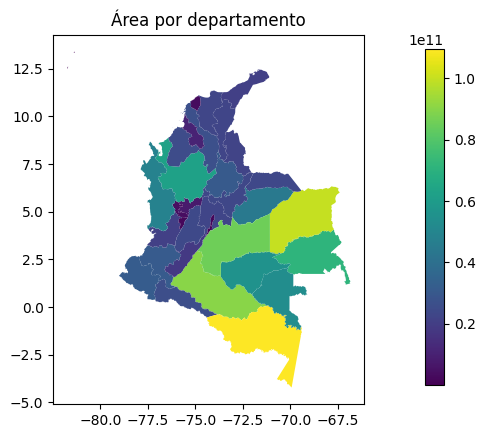

In [119]:
colombia_dgf.plot(
    column = 'AREA',
)
plt.title('Área por departamento')

min_p = min(colombia_dgf['AREA'])
max_p = max(colombia_dgf['AREA'])

bar = plt.cm.ScalarMappable(norm = plt.Normalize(vmin = min_p, vmax = max_p))

bar.a = []

cax = plt.axes([0.85, 0.15, 0.03, 0.7])

cbar = plt.colorbar(bar, cax)